# YZV311E Data Mining Project Data Preprocessing and Exploration

## Name : Yusuf Faruk Güldemir
## Student ID : 150210302

## Name : Hasan Taha Bağcı
## Student ID : 150210338

## -------------------------------

## Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from utils.datapreprocess import *
from utils.plotting import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading Data and Exploring General Features of Data

In [77]:
df = pd.read_csv("data/application_record.csv")
record = pd.read_csv("data/credit_record.csv")

In [78]:
df.shape 

(438557, 18)

* 438557 rows and 18 columns

In [79]:
record.shape

(1048575, 3)

In [80]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [81]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [83]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [84]:
record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [85]:
record.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [86]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [87]:
record.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [88]:
record.MONTHS_BALANCE.value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

* We need to merge these 2 datasets by using "user_id" column as a key.

In [89]:
df = df.merge(record, on='ID', how='inner')

In [90]:
df.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
743944,5148775,M,Y,Y,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,-10367,-2389,1,0,1,0,Sales staff,2.0,-10,C
709990,5142547,F,Y,Y,0,157500.0,Commercial associate,Higher education,Single / not married,House / apartment,-15849,-1138,1,0,0,0,Private service staff,1.0,-9,C
315606,5061619,M,Y,Y,0,427500.0,State servant,Incomplete higher,Single / not married,Rented apartment,-11943,-3150,1,0,1,0,High skill tech staff,1.0,-15,C
100671,5024769,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-14749,-884,1,1,1,0,Cooking staff,2.0,-46,C
749393,5149101,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21026,365243,1,0,0,0,NaN,2.0,-40,X


#### Changing the columns lower names for better understanding

In [91]:
df.columns = df.columns.str.lower()

#### Getting Categoric and Numeric Features

In [92]:
categorical_features = []
numerical_features = []
for col in df.columns:
    iscategoric = isCategorical(df, col, threshold=10)
    isnumeric = isNumerical(df, col)
    print("Column : ", col)
    print("Number of unique values: ", df[col].nunique(), "- Is it categorical : ", iscategoric)
    if iscategoric:
        categorical_features.append(col)
    if isnumeric:
        numerical_features.append(col)


print("Categorical features : ", categorical_features)
print("Numerical features : ", numerical_features)

Column :  id
Number of unique values:  36457 - Is it categorical :  False
Column :  code_gender
Number of unique values:  2 - Is it categorical :  True
Column :  flag_own_car
Number of unique values:  2 - Is it categorical :  True
Column :  flag_own_realty
Number of unique values:  2 - Is it categorical :  True
Column :  cnt_children
Number of unique values:  9 - Is it categorical :  True
Column :  amt_income_total
Number of unique values:  265 - Is it categorical :  False
Column :  name_income_type
Number of unique values:  5 - Is it categorical :  True
Column :  name_education_type
Number of unique values:  5 - Is it categorical :  True
Column :  name_family_status
Number of unique values:  5 - Is it categorical :  True
Column :  name_housing_type
Number of unique values:  6 - Is it categorical :  True
Column :  days_birth
Number of unique values:  7183 - Is it categorical :  False
Column :  days_employed
Number of unique values:  3640 - Is it categorical :  False
Column :  flag_mobi

#### Information about Missing Values

In [93]:
df.isna().sum()

id                          0
code_gender                 0
flag_own_car                0
flag_own_realty             0
cnt_children                0
amt_income_total            0
name_income_type            0
name_education_type         0
name_family_status          0
name_housing_type           0
days_birth                  0
days_employed               0
flag_mobil                  0
flag_work_phone             0
flag_phone                  0
flag_email                  0
occupation_type        240048
cnt_fam_members             0
months_balance              0
status                      0
dtype: int64

* It is seen that there are missing values only Occupation Type column.

#### Correlation Matrix of Data

<AxesSubplot:>

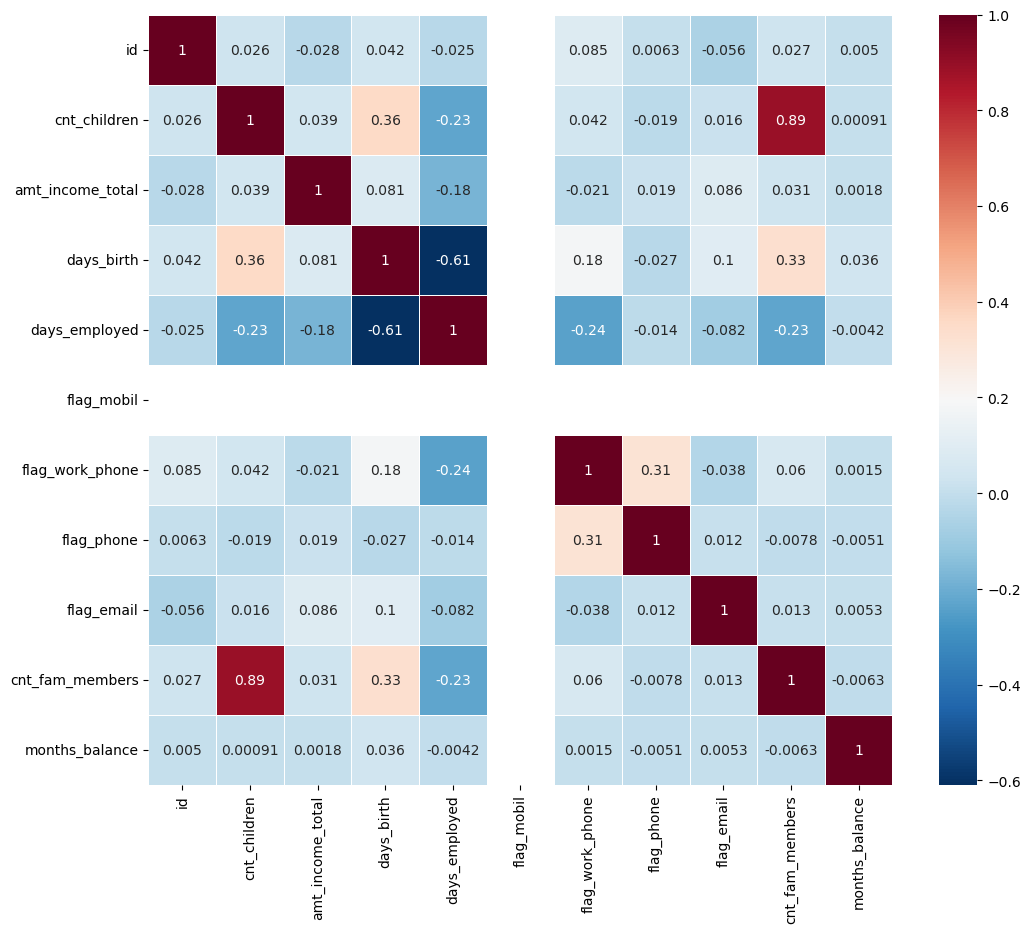

In [94]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


## Data Preprocessing

### Occupation Type Column

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: occupation_type, dtype: int64


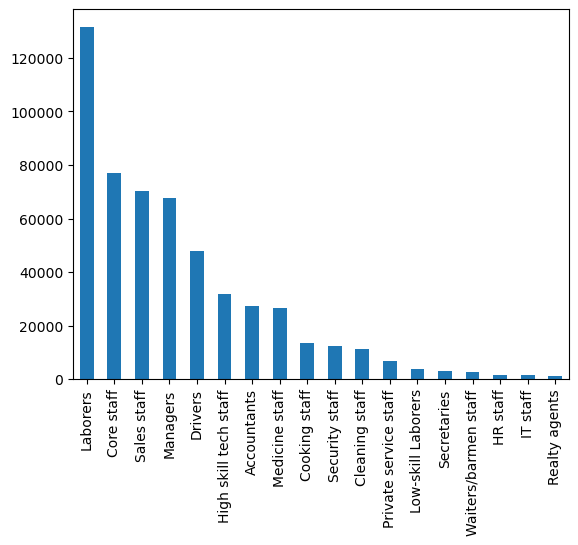

In [95]:
print(df["occupation_type"].value_counts())

df["occupation_type"].value_counts().plot(kind='bar')
plt.show()

In [96]:
df["occupation_type"].isna().sum()

240048

#### Filling Missing Values of Occupation Type Column with "Unknown" Value

In [97]:
df["occupation_type"].fillna("Unknown", inplace=True)

In [98]:
df.isna().sum()

id                     0
code_gender            0
flag_own_car           0
flag_own_realty        0
cnt_children           0
amt_income_total       0
name_income_type       0
name_education_type    0
name_family_status     0
name_housing_type      0
days_birth             0
days_employed          0
flag_mobil             0
flag_work_phone        0
flag_phone             0
flag_email             0
occupation_type        0
cnt_fam_members        0
months_balance         0
status                 0
dtype: int64

#### Labeling Occupation Type Column

* It is not seen as categoric feature beacuse of the threshold value is 10. However, we will use this column as categoric feature. So labeling is necessary.

In [99]:
df.occupation_type.value_counts()

Unknown                  240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: occupation_type, dtype: int64

In [100]:
df.occupation_type = labelEncoding(df, "occupation_type")

In [101]:
df.occupation_type.value_counts()

17    240048
8     131572
3      77112
14     70362
10     67738
4      47678
6      31768
0      27223
11     26691
2      13416
16     12400
1      11399
12      6714
9       3623
15      3149
18      2557
5       1686
7       1319
13      1260
Name: occupation_type, dtype: int64

### Days_Birth and Days_Employed Columns

In [102]:
df["days_birth"].describe()

count    777715.000000
mean     -16124.937046
std        4104.304018
min      -25152.000000
25%      -19453.000000
50%      -15760.000000
75%      -12716.000000
max       -7489.000000
Name: days_birth, dtype: float64

* Days_birth column is negative values. It shows the days passed from the birth of the person to the application date. So we need to convert it to positive values and convert it to years.

In [103]:
df["days_birth"] = round(abs(df["days_birth"]) / 365, 2)

In [104]:
df["days_birth"].describe()

count    777715.000000
mean         44.177938
std          11.244663
min          20.520000
25%          34.840000
50%          43.180000
75%          53.300000
max          68.910000
Name: days_birth, dtype: float64

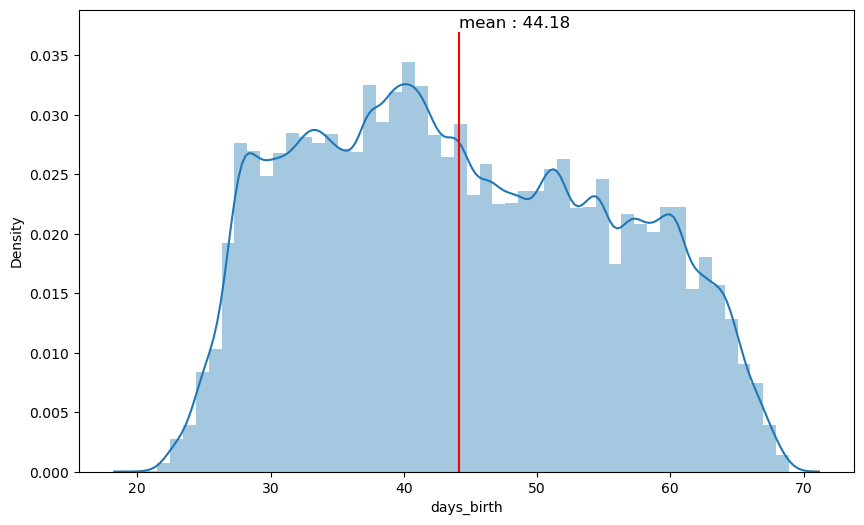

In [105]:
plotdist(df, "days_birth", mx=0.037)

Also it is same for days_emloyed column. However if the value is positive, it means that the person is unemployed. So we need to convert it to 0.

In [106]:
df["days_employed"].describe()

count    777715.000000
mean      57775.825016
std      136471.735391
min      -15713.000000
25%       -3292.000000
50%       -1682.000000
75%        -431.000000
max      365243.000000
Name: days_employed, dtype: float64

In [107]:
print(df[df["days_employed"] > 0].shape)
df[df["days_employed"] > 0]["days_employed"].describe()

(127972, 20)


count    127972.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: days_employed, dtype: float64

* 127792 rows are 0. It means that these people are unemployed.

In [108]:
df["days_employed"] = [x if x < 0 else 0 for x in df["days_employed"]] # replace positive values with 0. It means that the person is unemployed
df["days_employed"] = round(abs(df["days_employed"]) / 365, 2)

df["days_employed"].describe()

count    777715.000000
mean          6.368443
std           6.684403
min           0.000000
25%           1.180000
50%           4.610000
75%           9.020000
max          43.050000
Name: days_employed, dtype: float64

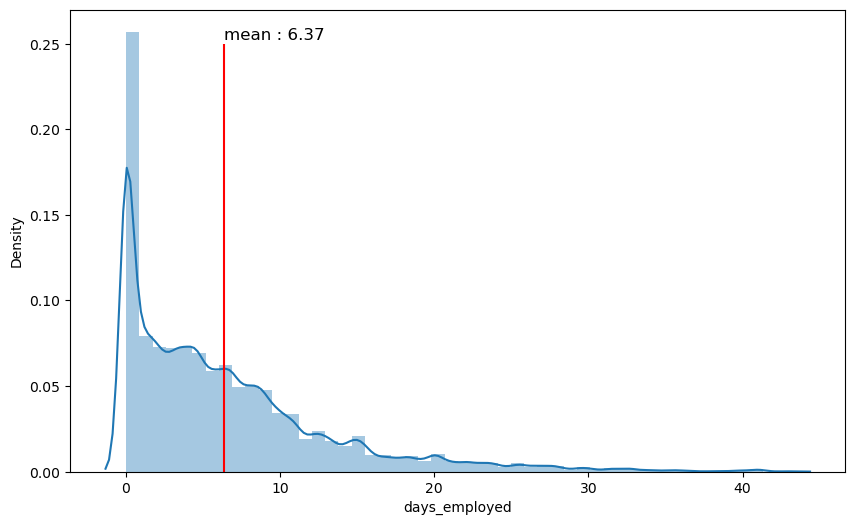

In [109]:
plotdist(df, "days_employed", mx=0.25)

In [110]:
df.rename(columns={"days_employed": "years_employed",
                     "days_birth": "age"}, inplace=True)

### Name Income Type Column

In [111]:
"name_income_type" in categorical_features

True

In [112]:
df["name_income_type"].value_counts() # Categoric

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: name_income_type, dtype: int64

In [113]:
df.name_income_type = labelEncoding(df, "name_income_type")

In [114]:
df.name_income_type.value_counts()

4    400164
0    183385
1    128392
2     65437
3       337
Name: name_income_type, dtype: int64

#### Name Education Type Column

In [115]:
df["name_education_type"].value_counts() # Categoric

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: name_education_type, dtype: int64

In [116]:
df.name_education_type = labelEncoding(df, "name_education_type")

df.name_education_type.value_counts()

4    524261
1    213633
2     30329
3      8655
0       837
Name: name_education_type, dtype: int64

#### Name Family Status Column

In [117]:
df["name_family_status"].value_counts() # Categoric

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: name_family_status, dtype: int64

In [118]:
df.name_family_status = labelEncoding(df, "name_family_status")

In [119]:
df.name_family_status.value_counts()

1    546619
3     94335
0     60342
2     45255
4     31164
Name: name_family_status, dtype: int64

#### Name Housing Type Column

In [120]:
df["name_housing_type"].value_counts() # Categoric

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: name_housing_type, dtype: int64

In [121]:
df.name_housing_type = labelEncoding(df, "name_housing_type")

In [122]:
df.name_housing_type.value_counts()

1    697151
5     35735
2     24640
4     10898
3      5636
0      3655
Name: name_housing_type, dtype: int64

#### Status Column

In [123]:
df.status.value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: status, dtype: int64

C,X,0 -> 1 (1 includes users who took no loans that month paid within the month or 30 days past the due date)
1,2,3,4,5 -> (0 includes users who pay within 30 to 149 days past the due date or have overdue debts for more than 150 days)
* 1 includes users who took no loans that month paid within the month or 30 days past the due date while 
* 0 includes users who pay within 30 to 149 days past the due date or have overdue debts for more than 150 days

In [124]:
df.status = [1 if (x == "C") or (x == "X") or (x == "0") else 0 for x in df.status]

In [125]:
df.status.value_counts()

1    766140
0     11575
Name: status, dtype: int64

In [126]:
categorical_features

['code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'status']

#### Other Binary Columns

In [127]:
df_temp_binary = df[['code_gender',
 'flag_own_car',
 'flag_own_realty',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email']]

In [128]:
for col in df_temp_binary.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())

code_gender
2
F    518851
M    258864
Name: code_gender, dtype: int64
flag_own_car
2
N    473355
Y    304360
Name: flag_own_car, dtype: int64
flag_own_realty
2
Y    512948
N    264767
Name: flag_own_realty, dtype: int64
flag_mobil
1
1    777715
Name: flag_mobil, dtype: int64
flag_work_phone
2
0    597427
1    180288
Name: flag_work_phone, dtype: int64
flag_phone
2
0    543650
1    234065
Name: flag_phone, dtype: int64
flag_email
2
0    706418
1     71297
Name: flag_email, dtype: int64


There is not anyone who does not have a mobil. So we can drop this column.

In [129]:
df = df.drop("flag_mobil", axis=1)

In [130]:
df_temp_binary = df_temp_binary.drop("flag_mobil", axis=1)

Gender, flag_own_reality, flag_own_car columns are binary columns. However, we need to convert them to 0 and 1.

In [131]:
for col in df_temp_binary.columns:
    df[col] = labelEncoding(df, col)

In [134]:
df.sample(10)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,age,years_employed,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
83207,5023755,0,1,1,0,135000.0,1,4,4,1,62.99,0.00,0,0,0,17,1.0,-37,1
616854,5116953,1,1,1,0,157500.0,0,1,1,1,44.06,4.93,0,0,0,4,2.0,-47,1
182015,5038637,0,0,1,0,135000.0,1,4,1,1,57.50,0.00,0,1,0,17,2.0,-54,1
3076,5009019,0,0,1,2,216000.0,2,1,1,1,42.31,8.53,0,0,1,17,4.0,-3,1
69976,5022952,1,1,1,0,112500.0,4,4,1,1,50.12,1.43,1,0,0,17,2.0,-26,1
676703,5135617,1,0,1,0,90000.0,4,4,3,1,41.64,1.30,0,0,0,9,1.0,-27,1
478426,5092343,0,0,1,0,225000.0,4,4,4,1,52.75,5.64,0,0,0,14,1.0,-1,1
598518,5115862,0,1,1,1,315000.0,4,4,1,1,42.48,16.71,0,0,0,8,3.0,-32,1
149529,5033873,1,1,1,1,157500.0,0,4,1,1,36.29,1.74,0,0,0,10,3.0,-25,1
573599,5113472,1,0,1,0,202500.0,4,4,1,1,52.60,0.95,0,1,0,6,2.0,-45,1


We did not label the cnt_children and cnt_fam_members columns because they are already numeric features. They have less unique values than the threshold value. However these columns are not actually categoric features.

## Feature Extraction and Engineering